In [4]:
# Importing the dataset
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


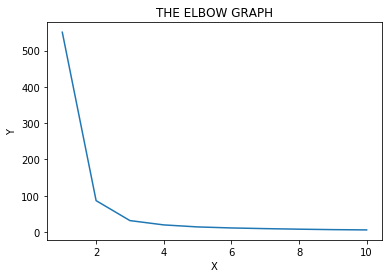

In [11]:
# a) Use the columns: 'SepalLenghtCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'
# as the input variables. 
X = data.iloc[:, [3,4]].values
wcss_list = []

# b) Compute the optimal number of clusters 'K' with Elbow method.
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title("THE ELBOW GRAPH")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

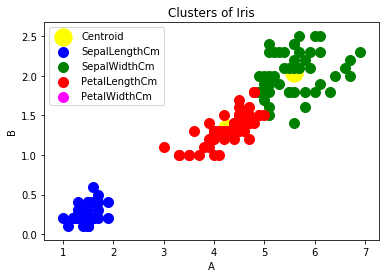

In [21]:
# Visualize the data representation of K-means clustering.
kmeans = KMeans(n_clusters=3)
y_predict = kmeans.fit_predict(X)

centers = kmeans.cluster_centers_

# Data representation of K-means Clustering 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroid')

plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s=100, c='blue',
label='SepalLengthCm')

plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s=100, c='green',
label='SepalWidthCm')

plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s=100, c='red', label='PetalLengthCm')

plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s=100, c='magenta',
label='PetalWidthCm')

plt.title('Clusters of Iris')
plt.xlabel('A')
plt.ylabel('B')
plt.legend()
plt.show()

In [15]:
# Display the Cluster Centroids 
centers = kmeans.cluster_centers_
print("Cluster Centroids: ", centers)

Cluster Centroids:  [[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


In [18]:
# Tabulate the Silhouette Score and Davies-Bouldin-Score

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
s_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
d_score = davies_bouldin_score(X, kmeans.labels_)
print("Silhouette Score: %.2f" %s_score)
print("Davies-Bouldin Score: %.2f" %d_score)

Silhouette Score: 0.66
Davies-Bouldin Score: 0.48
